In [1]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *

In [2]:
from scipy.interpolate import interp1d


# get CMB lensing kernel as a function
_chis = np.linspace(0, chimax, 11234)
_a_s = ccl.scale_factor_of_chi(cosmo, _chis)
_z_s = 1/_a_s - 1


zstar = 1100
cmbk = ccl.CMBLensingTracer(cosmo, z_source=zstar)
Dz = ccl.growth_factor(cosmo, _a_s)
Wk = cmbk.get_kernel(_chis)[0]

f_WkD = interp1d(_chis, Wk * Dz, 
                 bounds_error = False,
                fill_value='extrapolate')




In [3]:
oup = d_delta_integral(f_WkD, f_WkD)

In [4]:
oup.shape

(100, 64)

In [5]:
from scipy.integrate import trapezoid

In [6]:
_ClKK = trapezoid(x = chibs, y = oup)
ClKK = d_chib_integral(f_WkD, f_WkD)
limber_ClKK = limber_cross(f_WkD, f_WkD)

[]

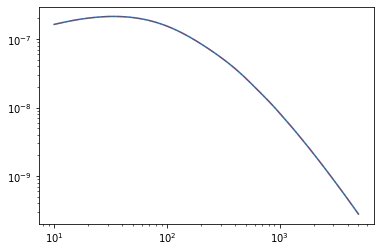

In [7]:
plt.plot(ells, ClKK)
plt.plot(ells, _ClKK, 'r-.', alpha=0.3)
plt.loglog()

[]

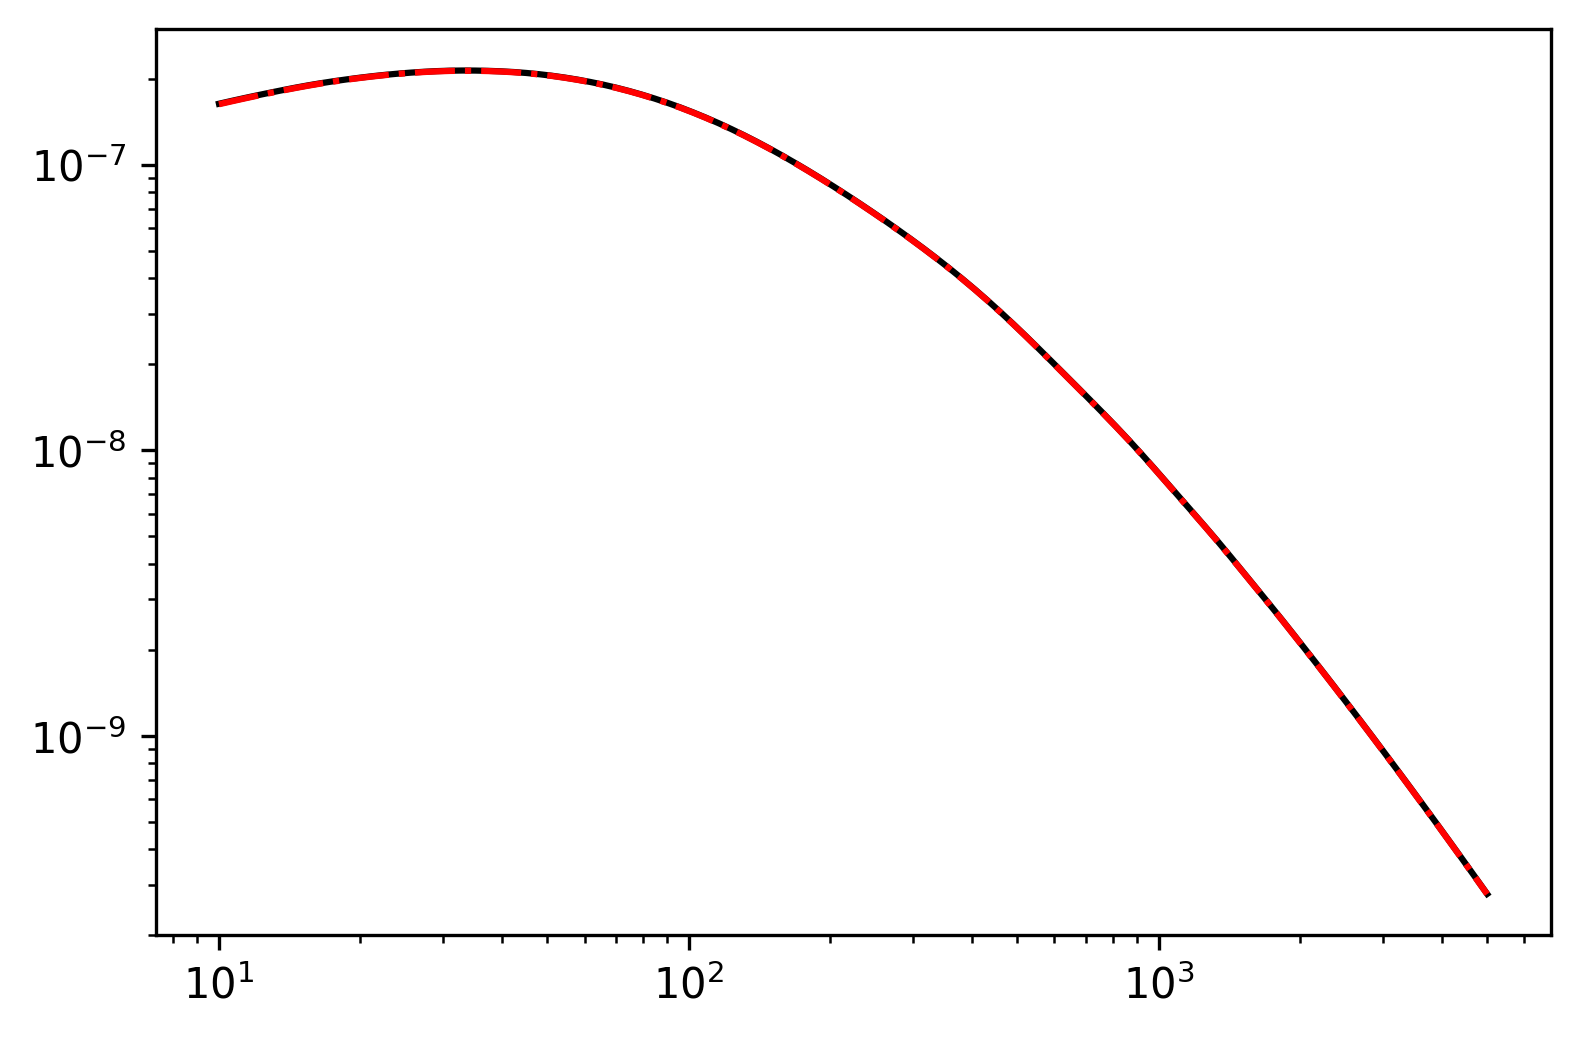

In [12]:
plt.figure(dpi = 300)
plt.plot(ells, ClKK, 'k')
plt.plot(ells, limber_ClKK, 'r-.')
plt.loglog()

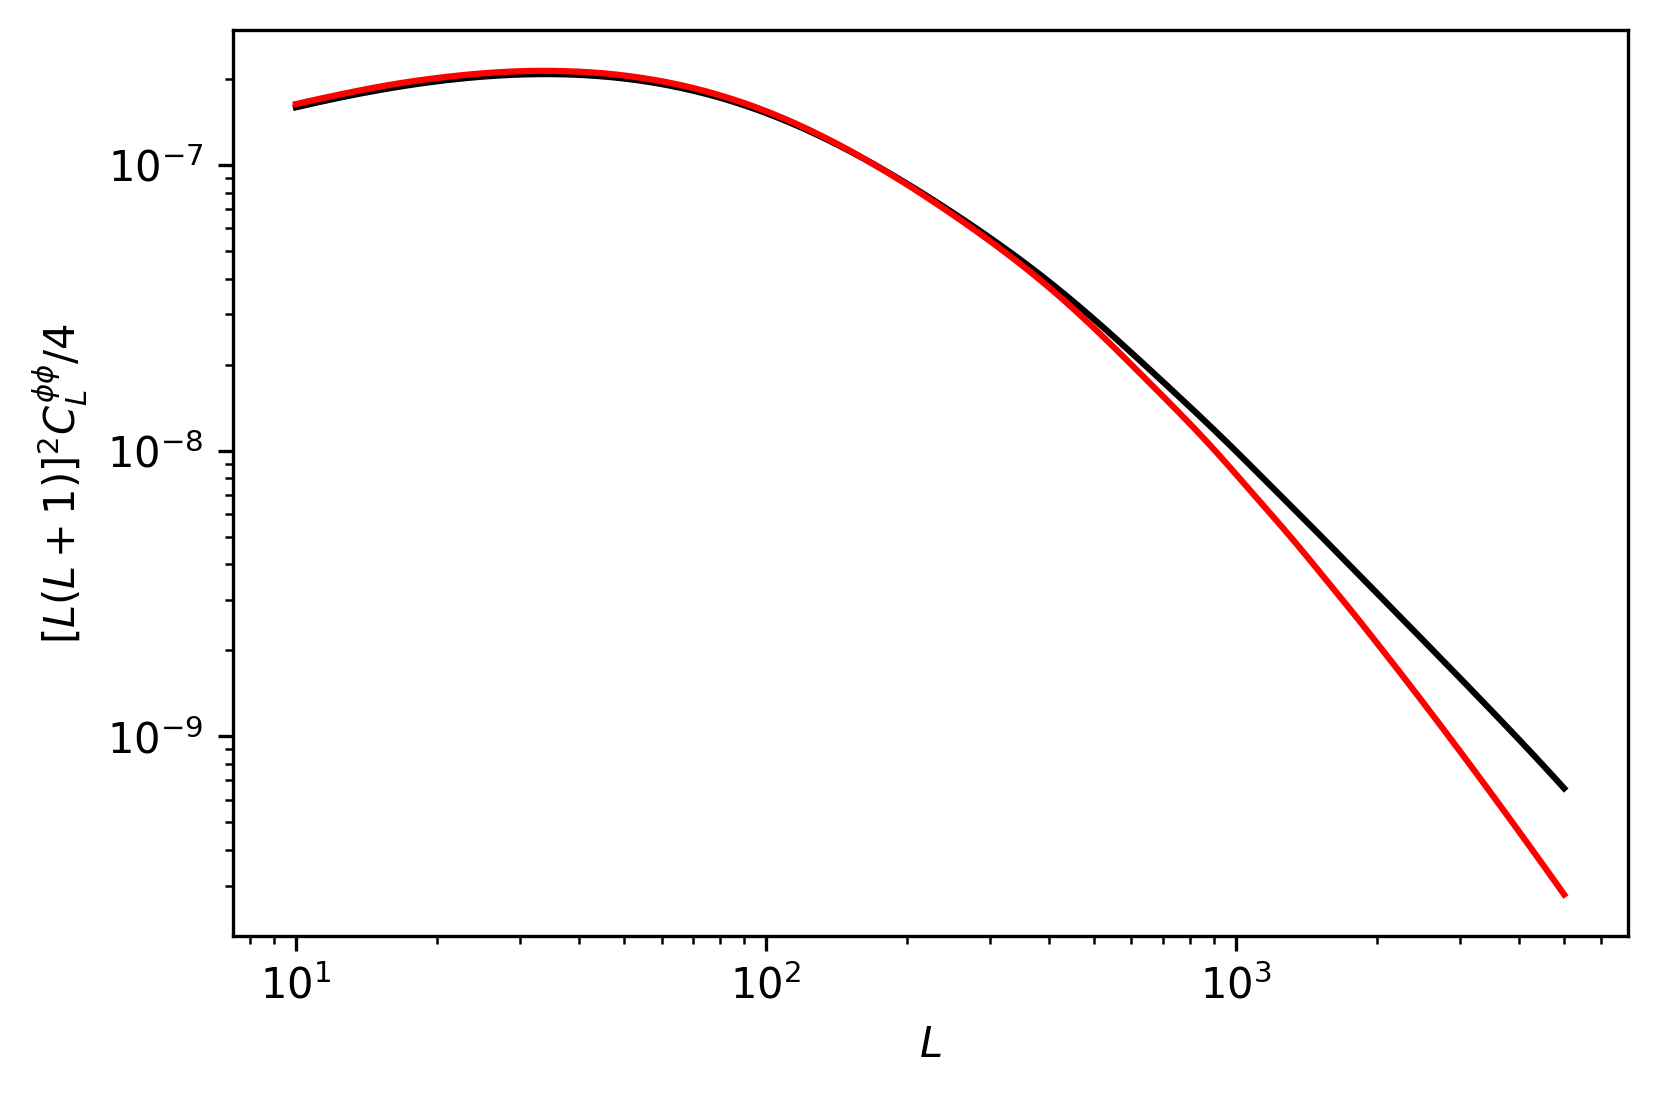

In [8]:
import camb
H0 = 100 * h
plt.figure(dpi=300)
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2)
pars.InitPower.set_params(ns=ns)
pars.set_for_lmax(int(max(ells)), lens_potential_accuracy=2)


results = camb.get_results(pars)
cl = results.get_lens_potential_cls(lmax=int(max(ells)))
plt.loglog(np.arange(int(max(ells)) + 1)[10:], cl[10:,0] * 2*np.pi / 4, 'k')
plt.ylabel('$[L(L+1)]^2C_L^{\phi\phi}/4$')
plt.xlabel('$L$')
# plt.xlim([2,2000]);

plt.plot(ells, ClKK, 'r', label='ours')